In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import analyze

/Users/steve/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


This data is from Santa Clara county, for March 12-23.

In [2]:
day = np.array([12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23])
count = np.array([37, 38, 48, 52, 56, 62, 65, 93, 108, 116, 125])

In [3]:
model = analyze.ExponentialGrowthRateEstimator(family='NegativeBinomial', alpha=0.1, cumulative = True)
model.fit(day, count)

In [4]:
growth_rate = model.growth_rate()
lower_ci, upper_ci = model.growth_rate_confint()
print("Growth rate is {} (95% CI {} - {})".format(growth_rate, lower_ci, upper_ci))

Growth rate is 0.1376751864425343 (95% CI 0.034222704426838835 - 0.251475938699637)


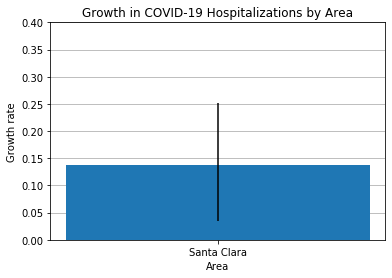

In [5]:
names = ["Santa Clara"]
ests = np.array([growth_rate])
errs = np.array([[growth_rate-lower_ci], [upper_ci-growth_rate]])
plt.rcParams['axes.axisbelow'] = True
plt.bar(range(len(names)), ests, yerr=errs, align='center')
plt.ylim([0,0.4])
plt.grid(axis='y')
plt.xlabel('Area')
plt.ylabel('Growth rate')
plt.title('Growth in COVID-19 Hospitalizations by Area')

plt.xticks(range(len(names)), names)
plt.show()